# And For Every K There Is A Phi.... #

    The topic for this weeks biweekly report is one I fell in love with, due to it's context and as the Professor described it, "How your linear algebra teacher would teach classification". Logistic Regression through likelyhoods, probabilitiy distrubutions, etc., was interesting, but not a strong suit for me. So for this report, I wanted to fully explain Kernalization, a powerful trick that changes the way we can approach classification problems, and is, as the Professor would say, cool.

# What was that at the beggining ? #

    Before I can explain what the mystic phrase was, we need to idenity the problem we are solving through kernelization. First, lets consider the the data set below :


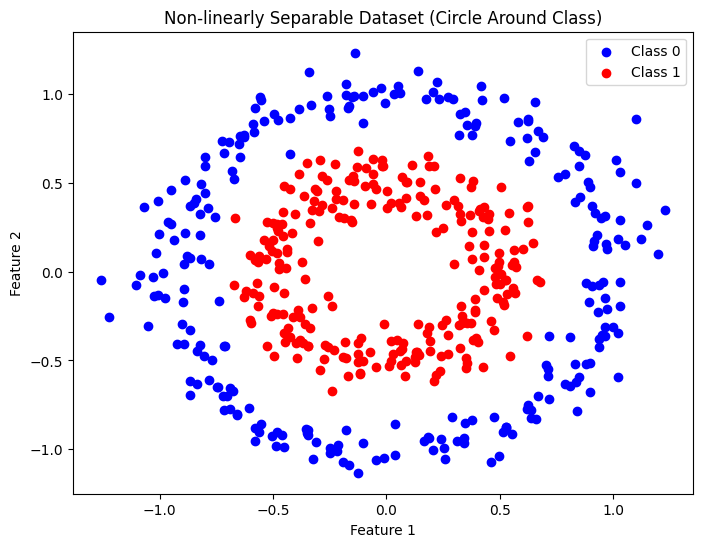

In [20]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset with non-linearly separable classes (circle around a class)
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1)

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-linearly Separable Dataset (Circle Around Class)")
plt.legend()
plt.show()


The data set above is a classic example of a non-linearlry seperable data set, where we have two classes, let's say A and B for now. Attempting to make a linear model on this data set would be impossible, as we will demonstrate below.

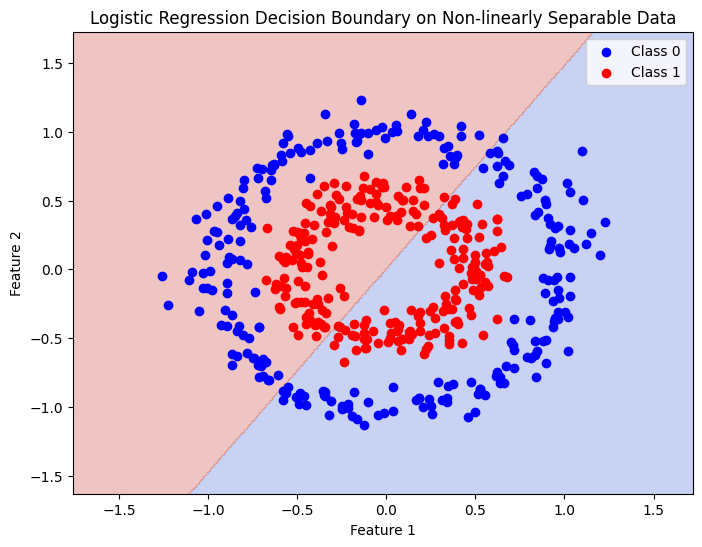

Accuracy of Logistic Regression  0.504


In [21]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import time #we will use this later

start_time_1 = time.time()
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)
end_time_1 = time.time() - start_time_1

# Generate a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the grid to get the decision boundary
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary on Non-linearly Separable Data")
plt.legend()
plt.show()

# Calculate and display accuracy
accuracy = log_reg.score(X, y)
print("Accuracy of Logistic Regression ",accuracy)


This is absolutley terrible, since the accuracy is comparable to randomly guessing. No matter what we tried, we wouldn't be able to make a linear model that would be able to classify this data set in such a way. 
# What can we try ? # 
It's clear that given our current dimensions, (2D), we cannot seperate our data. However, if we were to add an extra dimension, akin to "lets create way to compare this data", we could attempt to see if it will be seperable in this new dimension. 


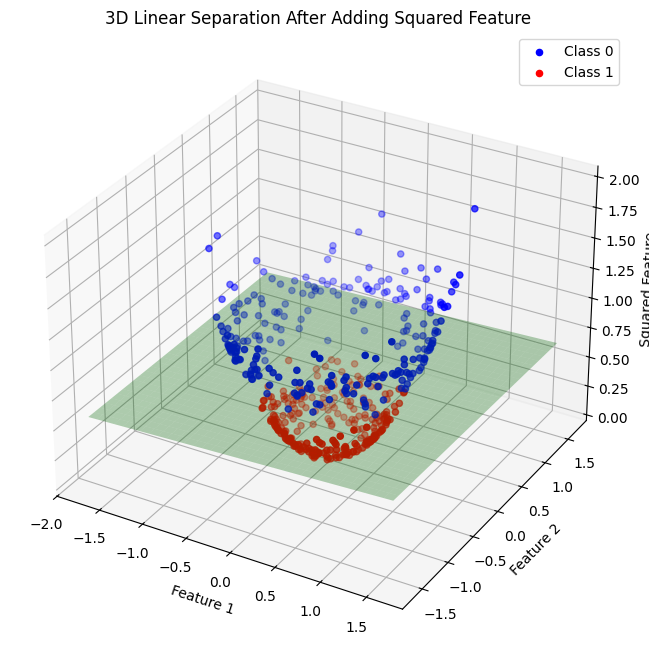

0.998

In [22]:
from mpl_toolkits.mplot3d import Axes3D

#begin time checking
start_time = time.time()
# Create the new squared feature
X_3d = np.hstack((X, (X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)))
#stop time checking
transformation_time = time.time() - start_time


# Train a Logistic Regression model on the 3D data
log_reg_3d = LogisticRegression()
log_reg_3d.fit(X_3d, y)
end_time = time.time() - start_time 

# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
ax.scatter(X_3d[y == 0][:, 0], X_3d[y == 0][:, 1], X_3d[y == 0][:, 2], color='blue', label="Class 0")
ax.scatter(X_3d[y == 1][:, 0], X_3d[y == 1][:, 1], X_3d[y == 1][:, 2], color='red', label="Class 1")

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_3d[:, 0].min() - 0.5, X_3d[:, 0].max() + 0.5
y_min, y_max = X_3d[:, 1].min() - 0.5, X_3d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Calculate the decision boundary in 3D
zz = -(log_reg_3d.coef_[0][0] * xx + log_reg_3d.coef_[0][1] * yy + log_reg_3d.intercept_[0]) / log_reg_3d.coef_[0][2]

# Plot the decision plane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.3)

# Label the axes and set the title
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Squared Feature")
ax.set_title("3D Linear Separation After Adding Squared Feature")
ax.legend()
plt.show()

# Calculate and display new accuracy
accuracy_3d = log_reg_3d.score(X_3d, y)
accuracy_3d


The increase in accuracy is now absolutley astounding. We went from a model equivalent to a coinflip, to now almost being able to predict class with absolute certaintity. This fundamental idea of transforming our data into a dimension in where we can slice and classify, is of course data transformation, and our mapping to this higher dimesnion, is called the $\phi$ function

# So what's the catch ? #

In [23]:
print("Time for first 2D model to train: ", end_time_1)
print("Time to transform data in second model: " , transformation_time)
print("Time to train second model + transformation", end_time)
print(end_time / end_time_1 , "times more time required")

Time for first 2D model to train:  0.0014576911926269531
Time to transform data in second model:  9.393692016601562e-05
Time to train second model + transformation 0.002343416213989258
1.6076218514883873 times more time required


While we did increase our accuracy in the second model, it does in fact come at a cost, like everything does (nothing is free). In this case, it was took 40% to transform and train the model. While of course in this context, thats a wonderful price to pay, in real world applications, this would could to days of extra time being required. The cause of the complexity not only comes transforming the data, but then perform computations in a higher dimension than previously. The $\phi$ mappings are very expensive, so if only there was a way to reduce the computation cost......oh there is.

To clarify, the added complexity of computing the dot products in a higher dimension is what adds to our cost. However, we can define a **kernel**, for which a cheaper computation in our current dimension will be the equivalent of a dot product in a higher dimension.

With kernlization, we define a kernel K such that:

$k(x_i,x_j) = \phi(x) \cdot \phi (x)$

It's important to note there is are literally uncountable numbers of kernels we can used, but for now let's say there are intuitive ones. We want to use this property of k and phi, in order to reduce our computation time and benefit from higher-dimension comparisons. What's really intriguing and amazing about this approach, is what we're doing in these dot product comparisons. As a refresher, the closer a the dog product increases as the vectors are more similar. What we are doing is maximizing:

$\sum a_i - 0.5 \sum a_i a_j y_i y_j k(x_i , x_j) $

Which is the Dual of our original Linear SVM Problem ! Instead of minimizing are weights, we are maximizing the summation, as the dot product is a similarity score. Let's give some examples of K that come from phi, and how computational complexity is reduced. 

If we define $\phi (x)$ to be:

$(x_1,....,x_p , x_1^2,.....,x_p^2,....\sqrt{2} x_1x_2.....\sqrt{2} x_{p-1}  x_p)$

An equivalent K for this would be:

$ x_i \cdot x_j + (x_i \cdot x_j)^2 $

Equivalent to the dot product of two vectors in $\phi$ after a transformation.

An example I computed myself was the defintion of $\phi$ = (x_1,x_2,x_1^2,x_2^2,x_1*x_2). The correspond dot product that is turned into a phi from this would be: 

$a_1b_1 + a_2b_2 + (a_1)^2(b_1)^2+(a_2)^2(b_2)^2+a_1a_2b_1b_2$ , equivalent to 

$ K(a,b) = 1/4 (2 (a \cdot b)+ 1)^2 + 1/4 (3 a_2^2 b_2^2 + 2 a_2 b_2 - 1)$

Saving computation time from having to go to the other dimension every time and perform computations.

# Applications of K and Phi #

Similarly to above, I want to compare the time improvements gained from using K in comparison to $\phi$ 

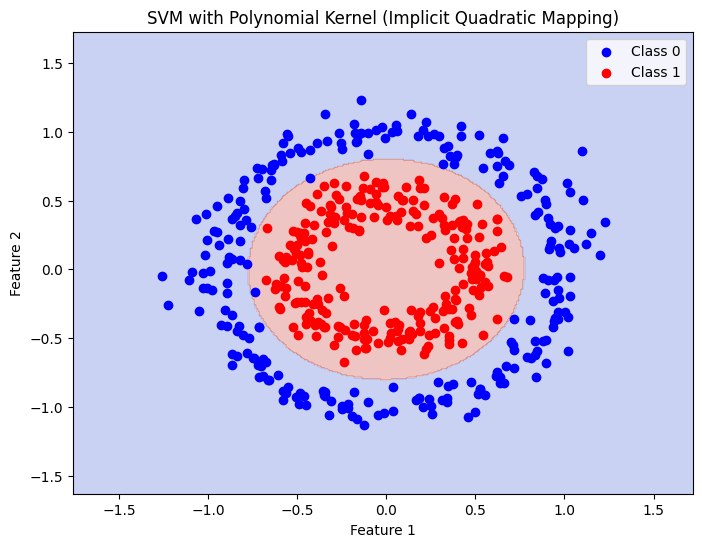

Model accuracy: 0.9960
Time taken to map: 7.62939453125e-05
Total Time Taken:  0.0017483234405517578
1.3403791081412793 is the the difference in time between performing phi vs using k)


In [24]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

start_time_2 = time.time()
# Train an SVM model with a polynomial kernel to simulate the quadratic feature map
svm_poly = SVC(kernel='poly', degree=2, C=1, gamma='auto')
kernel_time = time.time() - start_time_2
svm_poly.fit(X, y)
training_time_2 = time.time() - start_time_2 

# Generate a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict over the grid to get the decision boundary
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with Polynomial Kernel (Implicit Quadratic Mapping)")
plt.legend()
plt.show()

# Calculate and display accuracy
accuracy_svm_poly = svm_poly.score(X, y)
print(f"Model accuracy: {accuracy_svm_poly:.4f}")
print("Time taken to map:", kernel_time)
print("Total Time Taken: ", training_time_2)
print(end_time / training_time_2 ,"is the the difference in time between performing phi vs using k)")

We see that the model that transformed the data into a higher dimension took 34% more time to train vs our kernalized model, while having the same accuracy. This is not neglible, and in other cases where the data is much more complex in its shape and size, kernelization is an even more powerful tool. 

# Summary # 
The main takeaway regarding Kernelization, is that by understanding our problem and changing our objective, we can benefit from higherdimension analysis while minimzing the cost of doing so, through an equivalent expression in our current dimension. With SVM's, we usually have to guess our $\phi$ however, in future explorations it is possible to learn our phi through our data itself. Usually, this isn't possible in data-poor fields, as we don't have enough data to really learn everything. However, with abhorent amounts of data, it is possible to learn our phi through Deep Kernel Learning, which is useful when data has intricacies that a hand crafted kernel couldn't capture. The fantastic thing however, is that it exists. Why? thats because, for every $\phi$ there is a K, and for every K, there is a $\phi$